In [1]:
import pandas as pd
import os
import requests
from config import pt_gkey
from config import api_key_c
import gmaps
gmaps.configure(api_key=pt_gkey)
import numpy as np

In [2]:
file_path = os.path.join("Resources","us-counties.csv")
df=pd.read_csv(file_path)

In [3]:
df.head()

,date,county,state,fips,cases,deaths
0,1/21/2020,Snohomish,Washington,53061.0,1,0
1,1/22/2020,Snohomish,Washington,53061.0,1,0
2,1/23/2020,Snohomish,Washington,53061.0,1,0
3,1/24/2020,Cook,Illinois,17031.0,1,0
4,1/24/2020,Snohomish,Washington,53061.0,1,0


In [4]:
df_new=df.dropna()

In [5]:
df_march=df_new[df_new['date']=='2020-03-11']

In [6]:
df_march.sort_values(['cases'],ascending=False)

,date,county,state,fips,cases,deaths


In [7]:
df_may=df_new[df_new['date']=='2020-05-06']

In [8]:
df_may.reset_index(drop=True,inplace=True)

In [9]:
df_may.sort_values(['cases'],ascending=False)

,date,county,state,fips,cases,deaths


In [10]:
dd=df_may[['fips','cases']]

In [11]:
dd

,fips,cases


In [12]:
gg=df_may.groupby(['fips'])

In [13]:
df_new_date=df_new[df_new['date']=='2020-09-08']

In [14]:
df_new_date.reset_index(inplace=True,drop=True)

In [15]:
df_new_date.head()

,date,county,state,fips,cases,deaths


In [16]:
merged=pd.merge(df_new_date,dd,on='fips')

In [17]:
merged['rate']=(merged['cases_x']-merged['cases_y'])/merged['cases_y']

In [18]:
rate_df=merged.sort_values(['rate'],ascending=False)

In [19]:
rate_df.reset_index(drop=True,inplace=True)

In [20]:
rate_df.head()

,date,county,state,cases_x,deaths,fips,cases_y,rate


In [21]:
#df.groupby(df['date'].dt.strftime('%B'))['Revenue'].sum().sort_values()

In [22]:
rate_df['date']=pd.to_datetime(rate_df['date'])

In [23]:
rate_df.groupby(rate_df['date'].dt.strftime('%B'))['cases_x'].sum()

Series([], Name: cases_x, dtype: int64)

## Census Information

In [24]:
# Notes / comments from Tobias

# Please note that some 2019 Data for the ACS will be released on September 17th or later. Details found at the following: 
# https://www.census.gov/programs-surveys/acs/news/data-releases/2019/release-schedule.html

# Instead will get the 2014—2018 ACS 5-Year Narrative Profile. Snapshot / overview is at the following:     
# https://www.census.gov/acs/www/data/data-tables-and-tools/narrative-profiles/2018/report.php?geotype=nation&usVal=us

# Within this snapsot is education, employer type / industry,  occupation, how they commute to work,income, 
# population by age and sex, and type of housing (single family vs apartments / multi-unit). 

# Reference class example from Session 6.3 Geocoding on Census. 

In [25]:
# Python Wrapper for Census API 
from census import Census
import requests

In [26]:
# Census API Key
from config import api_key_c

In [27]:
# provide the api key and the year to establish a session
c = Census(api_key_c, year=2018)

In [28]:
# Set an option to allow up to 300 characters to print in each column
pd.set_option('max_colwidth', 300)

In [29]:
# query for ACS tables
tables = c.acs5.tables()

In [30]:
table_df=pd.DataFrame(tables)
table_df.head(50)

,name,description,variables
0,B17015,POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY SOCIAL SECURITY INCOME BY SUPPLEMENTAL SECURITY INCOME (SSI) AND CASH PUBLIC ASSISTANCE INCOME,https://api.census.gov/data/2018/acs/acs5/groups/B17015.json
1,B18104,SEX BY AGE BY COGNITIVE DIFFICULTY,https://api.census.gov/data/2018/acs/acs5/groups/B18104.json
2,B17016,POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY WORK EXPERIENCE OF HOUSEHOLDER AND SPOUSE,https://api.census.gov/data/2018/acs/acs5/groups/B17016.json
3,B18105,SEX BY AGE BY AMBULATORY DIFFICULTY,https://api.census.gov/data/2018/acs/acs5/groups/B18105.json
4,B17017,POVERTY STATUS IN THE PAST 12 MONTHS BY HOUSEHOLD TYPE BY AGE OF HOUSEHOLDER,https://api.census.gov/data/2018/acs/acs5/groups/B17017.json
5,B18106,SEX BY AGE BY SELF-CARE DIFFICULTY,https://api.census.gov/data/2018/acs/acs5/groups/B18106.json
6,B17018,POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY HOUSEHOLD TYPE BY EDUCATIONAL ATTAINMENT OF HOUSEHOLDER,https://api.census.gov/data/2018/acs/acs5/groups/B17018.json
7,B18107,SEX BY AGE BY INDEPENDENT LIVING DIFFICULTY,https://api.census.gov/data/2018/acs/acs5/groups/B18107.json
8,B07001PR,GEOGRAPHICAL MOBILITY IN THE PAST YEAR BY AGE FOR CURRENT RESIDENCE IN PUERTO RICO,https://api.census.gov/data/2018/acs/acs5/groups/B07001PR.json
9,B19301A,PER CAPITA INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE),https://api.census.gov/data/2018/acs/acs5/groups/B19301A.json


### Total Population

In [31]:
# B01003 TOTAL POPULATION

table_id ='B01003'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(10)

Number of available variables: 4


,label,concept,predicateType,group,limit,predicateOnly
B01003_001E,Estimate!!Total,TOTAL POPULATION,int,B01003,0,True
B01003_001M,Margin of Error!!Total,TOTAL POPULATION,int,B01003,0,True
B01003_001MA,Annotation of Margin of Error!!Total,NaN,string,B01003,0,True
B01003_001EA,Annotation of Estimate!!Total,NaN,string,B01003,0,True


### Population by Gender

In [32]:
# B98012 TOTAL POPULATION COVERAGE RATE BY SEX

table_id ='B98012'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(10)

Number of available variables: 6


,label,concept,predicateType,group,limit,predicateOnly
B98012_002E,Estimate!!Total!!Male,TOTAL POPULATION COVERAGE RATE BY SEX,float,B98012,0,True
B98012_001E,Estimate!!Total,TOTAL POPULATION COVERAGE RATE BY SEX,float,B98012,0,True
B98012_003E,Estimate!!Total!!Female,TOTAL POPULATION COVERAGE RATE BY SEX,float,B98012,0,True
B98012_002EA,Annotation of Estimate!!Total!!Male,NaN,string,B98012,0,True
B98012_003EA,Annotation of Estimate!!Total!!Female,NaN,string,B98012,0,True
B98012_001EA,Annotation of Estimate!!Total,NaN,string,B98012,0,True


### Transportation to Work

In [33]:
# B08301 MEANS OF TRANSPORTATION TO WORK

table_id ='B08301'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(50)

Number of available variables: 84


,label,concept,predicateType,group,limit,predicateOnly
B08301_007M,"Margin of Error!!Total!!Car, truck, or van!!Carpooled!!In 4-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_007E,"Estimate!!Total!!Car, truck, or van!!Carpooled!!In 4-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_006M,"Margin of Error!!Total!!Car, truck, or van!!Carpooled!!In 3-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_006E,"Estimate!!Total!!Car, truck, or van!!Carpooled!!In 3-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_009M,"Margin of Error!!Total!!Car, truck, or van!!Carpooled!!In 7-or-more-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_009E,"Estimate!!Total!!Car, truck, or van!!Carpooled!!In 7-or-more-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_008M,"Margin of Error!!Total!!Car, truck, or van!!Carpooled!!In 5- or 6-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_008E,"Estimate!!Total!!Car, truck, or van!!Carpooled!!In 5- or 6-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_003M,"Margin of Error!!Total!!Car, truck, or van!!Drove alone",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_003E,"Estimate!!Total!!Car, truck, or van!!Drove alone",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True


### Select the Fields of Interest

In [34]:
census_data = c.acs5.get(("NAME", "B01003_001E", "B98012_001E", "B98012_002E", "B08301_003E", "B08301_011E", 
                          "B08301_021E"), 
                         {'for': 'zip code tabulation area:*'})
census_data[:5]

[{'NAME': 'ZCTA5 43964',
  'B01003_001E': 8642.0,
  'B98012_001E': None,
  'B98012_002E': None,
  'B08301_003E': 3173.0,
  'B08301_011E': 0.0,
  'B08301_021E': 75.0,
  'zip code tabulation area': '43964'},
 {'NAME': 'ZCTA5 28216',
  'B01003_001E': 51116.0,
  'B98012_001E': None,
  'B98012_002E': None,
  'B08301_003E': 20406.0,
  'B08301_011E': 742.0,
  'B08301_021E': 1499.0,
  'zip code tabulation area': '28216'},
 {'NAME': 'ZCTA5 28277',
  'B01003_001E': 71605.0,
  'B98012_001E': None,
  'B98012_002E': None,
  'B08301_003E': 28558.0,
  'B08301_011E': 326.0,
  'B08301_021E': 4072.0,
  'zip code tabulation area': '28277'},
 {'NAME': 'ZCTA5 28278',
  'B01003_001E': 27286.0,
  'B98012_001E': None,
  'B98012_002E': None,
  'B08301_003E': 11700.0,
  'B08301_011E': 36.0,
  'B08301_021E': 1282.0,
  'zip code tabulation area': '28278'},
 {'NAME': 'ZCTA5 28303',
  'B01003_001E': 29414.0,
  'B98012_001E': None,
  'B98012_002E': None,
  'B08301_003E': 11272.0,
  'B08301_011E': 131.0,
  'B08301_02

### Create DataFrame

In [35]:
# Create DataFrame

census_dataframe = pd.DataFrame(census_data)

# Format and update DataFrame
census_dataframe = census_dataframe.rename(columns={"B01003_001E": "Population",
                                                       "B98012_001E": "Population II",
                                                       "B98012_002E": "Male Population",
                                                       "B98012_003E": "Female Population",
                                                       "B08301_003E": "Drive to Work - Solo Driver", 
                                                       "B08301_011E": "Public Transportation",
                                                       "B08301_021E": "Work from Home", 
                                                       "NAME": "Name", 
                                                       "zip code tabulation area": "Zipcode"
                                                      })

census_dataframe.head()

,Name,Population,Population II,Male Population,Drive to Work - Solo Driver,Public Transportation,Work from Home,Zipcode
0,ZCTA5 43964,8642.0,None,None,3173.0,0.0,75.0,43964
1,ZCTA5 28216,51116.0,None,None,20406.0,742.0,1499.0,28216
2,ZCTA5 28277,71605.0,None,None,28558.0,326.0,4072.0,28277
3,ZCTA5 28278,27286.0,None,None,11700.0,36.0,1282.0,28278
4,ZCTA5 28303,29414.0,None,None,11272.0,131.0,512.0,28303


In [36]:

location= os.path.join('cases-lat-lng.csv')
df_latlng=pd.read_csv(location)


In [37]:
df_latlng.head()

,date,county,state,fips,cases,deaths,Latitude,Longitude
0,9/8/2020,Autauga,Alabama,1001,1508,24,32.579182,-86.499655
1,9/8/2020,Baldwin,Alabama,1003,4757,46,30.601074,-87.776333
2,9/8/2020,Barbour,Alabama,1005,778,7,31.817290,-85.354965
3,9/8/2020,Bibb,Alabama,1007,589,9,32.956280,-87.142290
4,9/8/2020,Blount,Alabama,1009,1390,12,34.014515,-86.499655


In [38]:
df_latlng=df_latlng.drop(['deaths'],axis=1)

In [39]:
df_latlng.head()

,date,county,state,fips,cases,Latitude,Longitude
0,9/8/2020,Autauga,Alabama,1001,1508,32.579182,-86.499655
1,9/8/2020,Baldwin,Alabama,1003,4757,30.601074,-87.776333
2,9/8/2020,Barbour,Alabama,1005,778,31.817290,-85.354965
3,9/8/2020,Bibb,Alabama,1007,589,32.956280,-87.142290
4,9/8/2020,Blount,Alabama,1009,1390,34.014515,-86.499655


In [40]:
place =os.path.join('Resources','ZIP-COUNTY-FIPS_2018-03.csv')
df_fp=pd.read_csv(place)

In [41]:
df_fp.head()

,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,36091,1001,Verbena,AL,Autauga County,H1
1,36758,1001,Plantersville,AL,Autauga County,H1
2,36006,1001,Billingsley,AL,Autauga County,H1
3,36067,1001,Prattville,AL,Autauga County,H1
4,36701,1001,Selma,AL,Autauga County,H1


In [42]:
fp=df_fp.groupby('STCOUNTYFP')

In [43]:
fp

In [44]:
place=os.path.join('Resources','census_dataframe.csv')
cen_df=pd.read_csv(place)

In [45]:
cen_df.head()

,Name,Population,Population II,Male Population,Drive to Work - Solo Driver,Public Transportation,Work from Home,Zipcode
0,ZCTA5 43964,8642,NaN,NaN,3173.0,0.0,75.0,43964
1,ZCTA5 28216,51116,NaN,NaN,20406.0,742.0,1499.0,28216
2,ZCTA5 28277,71605,NaN,NaN,28558.0,326.0,4072.0,28277
3,ZCTA5 28278,27286,NaN,NaN,11700.0,36.0,1282.0,28278
4,ZCTA5 28303,29414,NaN,NaN,11272.0,131.0,512.0,28303


In [46]:
data=cen_df[['Population','Zipcode']]

In [47]:
data_df=data.rename({'Zipcode':'ZIP'},axis=1)

In [48]:
data_df.head()

,Population,ZIP
0,8642,43964
1,51116,28216
2,71605,28277
3,27286,28278
4,29414,28303


In [49]:
zf=zipfp=pd.merge(data_df,df_fp,on='ZIP')

In [50]:
zf.head()

,Population,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,8642,43964,39081,Toronto,OH,Jefferson County,H1
1,51116,28216,37119,Charlotte,NC,Mecklenburg County,H1
2,71605,28277,37119,Charlotte,NC,Mecklenburg County,H1
3,27286,28278,37119,Charlotte,NC,Mecklenburg County,H1
4,29414,28303,37051,Fayetteville,NC,Cumberland County,H1


In [51]:
zipfp=zipfp.rename({'STCOUNTYFP':'fips'},axis=1)

In [52]:
g=zipfp.groupby('fips')['Population'].sum()

In [53]:
ss=pd.merge(df_latlng,g,on='fips')

In [54]:
ss.head()

,date,county,state,fips,cases,Latitude,Longitude,Population
0,9/8/2020,Autauga,Alabama,1001,1508,32.579182,-86.499655,105345
1,9/8/2020,Baldwin,Alabama,1003,4757,30.601074,-87.776333,227450
2,9/8/2020,Barbour,Alabama,1005,778,31.817290,-85.354965,30474
3,9/8/2020,Bibb,Alabama,1007,589,32.956280,-87.142290,84537
4,9/8/2020,Blount,Alabama,1009,1390,34.014515,-86.499655,157623


In [55]:
resetss=ss.sort_values('Population',ascending=False)

In [56]:
resetss.reset_index(inplace=True,drop=True)

In [57]:
resetss.head()

,date,county,state,fips,cases,Latitude,Longitude,Population
0,9/8/2020,Los Angeles,California,6037,249241,34.052234,-118.243685,10590304
1,9/8/2020,Cook,Illinois,17031,132079,41.737659,-87.697554,5671859
2,9/8/2020,Harris,Texas,48201,112039,29.775182,-95.310250,5047263
3,9/8/2020,Maricopa,Arizona,4013,136040,33.058106,-112.047642,4387308
4,9/8/2020,San Diego,California,6073,41140,32.715738,-117.161084,3419051


In [58]:
resetss['Positivity_Rate']=(resetss['cases'])/(resetss['Population']/100000)

In [59]:
resetss.head()

,date,county,state,fips,cases,Latitude,Longitude,Population,Positivity_Rate
0,9/8/2020,Los Angeles,California,6037,249241,34.052234,-118.243685,10590304,2353.482960
1,9/8/2020,Cook,Illinois,17031,132079,41.737659,-87.697554,5671859,2328.672134
2,9/8/2020,Harris,Texas,48201,112039,29.775182,-95.310250,5047263,2219.797146
3,9/8/2020,Maricopa,Arizona,4013,136040,33.058106,-112.047642,4387308,3100.762472
4,9/8/2020,San Diego,California,6073,41140,32.715738,-117.161084,3419051,1203.257863


In [60]:
resetss['Positivity_Rate']=resetss['Positivity_Rate'].map("{:.0f}".format)

In [61]:
resetss['Positivity_Rate']=pd.to_numeric(resetss['Positivity_Rate'])

In [62]:
resetss.head()

,date,county,state,fips,cases,Latitude,Longitude,Population,Positivity_Rate
0,9/8/2020,Los Angeles,California,6037,249241,34.052234,-118.243685,10590304,2353
1,9/8/2020,Cook,Illinois,17031,132079,41.737659,-87.697554,5671859,2329
2,9/8/2020,Harris,Texas,48201,112039,29.775182,-95.310250,5047263,2220
3,9/8/2020,Maricopa,Arizona,4013,136040,33.058106,-112.047642,4387308,3101
4,9/8/2020,San Diego,California,6073,41140,32.715738,-117.161084,3419051,1203


In [63]:
resetss=resetss.sort_values((['Positivity_Rate']),ascending=False)

In [64]:
resetss.reset_index(inplace=True,drop=True)

In [65]:
gg=resetss[['fips','Population']]

In [66]:
rate_df.head()

,date,county,state,cases_x,deaths,fips,cases_y,rate


In [67]:
k100=pd.merge(rate_df,gg,on='fips')

In [68]:
k100.head()

,date,county,state,cases_x,deaths,cases_y,rate,fips,Population


In [69]:
k100=k100[k100['Population']>100000]

In [70]:
#dataframe sorted by rate for population over 100k
k100.sort_values(['rate'],ascending=False)

,date,county,state,cases_x,deaths,cases_y,rate,fips,Population


In [71]:
k100.reset_index(drop=True,inplace=True)

In [72]:
k100.head()

,date,county,state,cases_x,deaths,cases_y,rate,fips,Population


In [73]:
import matplotlib.pyplot as plt
import scipy.stats as sts

(0, 1000)

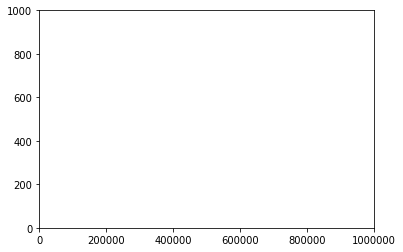

In [74]:
plt.scatter(k100['Population'],k100['cases_y'],s=k100['rate'])
plt.xlim(0,1000000)
plt.ylim(0,1000)

In [75]:
corr= sts.pearsonr(k100['Population'],k100['cases_y'])

ValueError: x and y must have length at least 2.

In [ ]:
corr

In [ ]:
ktop100=k100.head(100)

In [ ]:
df_latlng.head()

In [ ]:
df_sub=df_latlng[['fips','Latitude','Longitude']]

In [ ]:
type(df_sub)

In [ ]:
ktop100.head()

In [ ]:
ktop100=pd.merge(ktop100,df_sub,on='fips')

In [ ]:
ktop100.shape

In [ ]:
ktop100.head()

In [ ]:
output=os.path.join('Resources','ktop100.csv')
ktop100.to_csv(output,index=False,header=True)

In [ ]:
 top5=resetss.head()

In [ ]:
top5

In [ ]:
pt_locations =top5[['Latitude','Longitude']]
pt_cases=top5['Positivity_Rate'].astype(float)
pt_maxx=top5['Positivity_Rate'].max()


In [ ]:
fig=gmaps.figure()
heat_layer=gmaps.heatmap_layer(pt_locations,weights=pt_cases,dissipating=False,max_intensity=pt_maxx,point_radius=0.9)

In [ ]:
fig.add_layer(heat_layer)

In [ ]:
fig

In [ ]:
info_box_template = """
<dl>
<dt>County</dt><dd>{county}</dd>
<dt>State</dt><dd>{state}</dd>
<dt>Cases</dt><dd>{Positivity_Rate}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
covid_info = [info_box_template.format(**row) for index, row in top5.iterrows()]
locations = top5[["Latitude","Longitude"]]


In [ ]:
marker_layer=gmaps.marker_layer(locations,info_box_content=covid_info)
fig.add_layer(marker_layer)

In [ ]:
fig

# Mobility Analysis

In [ ]:
#Save dataframes for clean up and concatenation with moiblity data
output4 = os.path.join('Resources','full.csv')
df.to_csv(output4,index=False,header=True)

In [ ]:
#import mobility data
# Import data from .csv file
file_path = os.path.join("Resources","mobility_cases_by_area.csv")

df_mobility = pd.read_csv(file_path, index_col="Area Name")

df_mobility = df_mobility.sort_values("Date", ascending=True, inplace=False)
df_mobility=df_mobility.dropna()
df_mobility

In [ ]:
C_top5= ['Tehama, California', 'Madison, Arkansas', 'Sebastian, Arkansas', 'Meade, South Dakota', 'Bingham, Idaho']

In [ ]:
df_ctop1 = df_mobility.loc[C_top5[0]]
df_ctop2 = df_mobility.loc[C_top5[1]]
df_ctop3 = df_mobility.loc[C_top5[2]]
df_ctop4 = df_mobility.loc[C_top5[3]]
df_ctop5 = df_mobility.loc[C_top5[4]]



### Sample 1

In [ ]:
x1 = df_ctop1["Date"]
cas1 = df_ctop1["Daily Cases"]
mob1 = df_ctop1["Mobility % change"]


# Plot Cases (Left Y Axis)
fig, y1a = plt.subplots(1,1,figsize = (16,9), dpi = 80)
y1a.plot(x1, cas1, color="blue")

# Plot Mobility (Right Y Axis)
y1b = y1a.twinx() # create a second axes that shares the same x-axis
y1b.plot(x1, mob1, color="cyan")



# Formatting
y1a.set_xlabel('Date', fontsize = 18)
y1a.tick_params(axis='x', rotation=90, labelsize=14)
y1a.set_ylabel('# of Cases', color='blue', fontsize = 18)
y1a.tick_params(axis='y', rotation=0, color='tab:blue', labelsize=14)
y1a.set_ylim(-1,20)

y1b.set_ylabel('% Change in Mobility', color='tab:cyan', fontsize = 18)
y1b.tick_params(axis='y', color='tab:cyan', labelsize=14)
y1b.set_xticks(np.arange(0, len(x1), 77))
y1b.set_xticklabels(x1[::60], rotation=90, fontdict={'fontsize':10})
y1b.set_ylim(-0.5,2)


y1b.set_title('Daily COVID Cases vs. Change in Driving Mobility in Key Region - ' + C_top5[0], fontsize=20)


fig.tight_layout()
plt.show()

In [ ]:
# Create a regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob1.astype(float),cas1.astype(float))
regress_values = mob1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq


In [ ]:
plt.scatter(mob1, cas1 )
plt.rcParams.update({'figure.figsize':(16,9), 'figure.dpi':100})
plt.plot(mob1, regress_values, "orange")
plt.annotate(line_eq,(18,37), color = "blue", fontsize = 15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(18,36),fontsize=14,color="black")
plt.xlabel("Change in Mobility", fontsize = 18)
plt.ylabel("Daily Cases", fontsize = 18)
plt.title('Daily COVID Cases vs. Change in Driving Mobility in Key Region - ' + C_top5[0], fontsize = 20)

In [ ]:
c1 = sts.pearsonr(mob1,cas1)
c1

### Sample 2

In [ ]:
x2 = df_ctop2["Date"]
cas2 = df_ctop2["Daily Cases"]
mob2 = df_ctop2["Mobility % change"]


# Plot Cases (Left Y Axis)
fig, y2a = plt.subplots(1,1,figsize = (16,9), dpi = 80)
y2a.plot(x2, cas2, color="blue")

# Plot Mobility (Right Y Axis)
y2b = y2a.twinx() # create a second axes that shares the same x-axis
y2b.plot(x2, mob2, color="cyan")



# Formatting
y2a.set_xlabel('Date', fontsize = 18)
y2a.tick_params(axis='x', rotation=90, labelsize=14)
y2a.set_ylabel('# of Cases', color='blue', fontsize = 18)
y2a.tick_params(axis='y', rotation=0, color='tab:blue', labelsize=14)
y2a.set_ylim(-1,35)

y2b.set_ylabel('% Change in Mobility', color='tab:cyan', fontsize = 18)
y2b.tick_params(axis='y', color='tab:cyan', labelsize=14)
y2b.set_xticks(np.arange(0, len(x1), 77))
y2b.set_xticklabels(x1[::60], rotation=90, fontdict={'fontsize':10})
y2b.set_ylim(-0.5,2)


y2b.set_title('Daily COVID Cases vs. Change in Driving Mobility in Key Region - ' + C_top5[1], fontsize=20)


fig.tight_layout()
plt.show()

In [ ]:
# Create a regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob2.astype(float),cas2.astype(float))
regress_values = mob2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq


In [ ]:
plt.scatter(mob2, cas2 )
plt.rcParams.update({'figure.figsize':(16,9), 'figure.dpi':100})
plt.plot(mob2, regress_values, "orange")
plt.annotate(line_eq,(18,37), color = "blue", fontsize = 15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(18,36),fontsize=14,color="black")
plt.xlabel("Change in Mobility", fontsize = 18)
plt.ylabel("Daily Cases", fontsize = 18)
plt.title('Daily COVID Cases vs. Change in Driving Mobility in Key Region - ' + C_top5[1], fontsize = 20)

In [ ]:
c2 = sts.pearsonr(mob2,cas2)
c2

### Sample 3

In [ ]:
x3 = df_ctop3["Date"]
cas3 = df_ctop3["Daily Cases"]
mob3 = df_ctop3["Mobility % change"]


# Plot Cases (Left Y Axis)
fig, y3a = plt.subplots(1,1,figsize = (16,9), dpi = 80)
y3a.plot(x3, cas3, color="blue")

# Plot Mobility (Right Y Axis)
y3b = y3a.twinx() # create a second axes that shares the same x-axis
y3b.plot(x3, mob3, color="cyan")



# Formatting
y3a.set_xlabel('Date', fontsize = 18)
y3a.tick_params(axis='x', rotation=90, labelsize=14)
y3a.set_ylabel('# of Cases', color='blue', fontsize = 20)
y3a.tick_params(axis='y', rotation=0, color='tab:blue', labelsize=14)
y3a.set_ylim(-1,90)

y3b.set_ylabel('% Change in Mobility', color='tab:cyan', fontsize = 18)
y3b.tick_params(axis='y', color='tab:cyan', labelsize=14)
y3b.set_xticks(np.arange(0, len(x1), 77))
y3b.set_xticklabels(x1[::60], rotation=90, fontdict={'fontsize':10})
y3b.set_ylim(-0.6,1)


y3b.set_title('Daily COVID Cases vs. Change in Driving Mobility in Key Region - ' + C_top5[2], fontsize=20)


fig.tight_layout()
plt.show()

In [ ]:
# Create a regression line
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob3.astype(float),cas3.astype(float))
regress_values = mob3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq


In [ ]:
plt.scatter(mob3, cas3 )
plt.rcParams.update({'figure.figsize':(16,9), 'figure.dpi':100})
plt.plot(mob3, regress_values, "orange")
plt.annotate(line_eq,(18,37), color = "blue", fontsize = 15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(18,36),fontsize=14,color="black")
plt.xlabel("Change in Mobility", fontsize = 18)
plt.ylabel("Daily Cases", fontsize = 18)
plt.title('Daily COVID Cases vs. Change in Driving Mobility in Key Region - ' + C_top5[2], fontsize = 20)

### Sample 4

In [ ]:
x4 = df_ctop4["Date"]
cas4 = df_ctop4["Daily Cases"]
mob4 = df_ctop4["Mobility % change"]


# Plot Cases (Left Y Axis)
fig, y4a = plt.subplots(1,1,figsize = (16,9), dpi = 80)
y4a.plot(x4, cas4, color="blue")

# Plot Mobility (Right Y Axis)
y4b = y4a.twinx() # create a second axes that shares the same x-axis
y4b.plot(x4, mob4, color="cyan")



# Formatting
y4a.set_xlabel('Date', fontsize = 20)
y4a.tick_params(axis='x', rotation=90, labelsize=14)
y4a.set_ylabel('# of Cases', color='blue', fontsize = 18)
y4a.tick_params(axis='y', rotation=0, color='tab:blue', labelsize=14)
y4a.set_ylim(-1,70)

y4b.set_ylabel('% Change in Mobility', color='tab:cyan', fontsize = 18)
y4b.tick_params(axis='y', color='tab:cyan', labelsize=14)
y4b.set_xticks(np.arange(0, len(x1), 77))
y4b.set_xticklabels(x1[::60], rotation=90, fontdict={'fontsize':10})
y4b.set_ylim(-0.5,14)


y4b.set_title('Daily COVID Cases vs. Change in Driving Mobility in Key Region - ' + C_top5[3], fontsize=20)


fig.tight_layout()
plt.show()

In [ ]:
# Create a regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob4.astype(float),cas4.astype(float))
regress_values = mob4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq


In [ ]:
plt.scatter(mob4, cas4 )
plt.plot(mob4, regress_values, "orange",)
plt.annotate(line_eq,(18,37), color = "blue", fontsize = 15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(18,36),fontsize=14,color="black")
plt.xlabel("Change in Mobility", fontsize = 18)
plt.ylabel("Daily Cases", fontsize = 18)
plt.title('Daily COVID Cases vs. Change in Driving Mobility in Key Region - ' + C_top5[3], fontsize=20)
plt.rcParams.update({'figure.figsize':(16,9), 'figure.dpi':100})


In [ ]:
c4 = sts.pearsonr(mob4,cas4)
c4

### sample 5

In [ ]:
x5 = df_ctop5["Date"]
cas5 = df_ctop5["Daily Cases"]
mob5 = df_ctop5["Mobility % change"]


# Plot Cases (Left Y Axis)
fig, y5a = plt.subplots(1,1,figsize = (16,9), dpi = 80)
y5a.plot(x5, cas5, color="blue")

# Plot Mobility (Right Y Axis)
y5b = y5a.twinx() # create a second axes that shares the same x-axis
y5b.plot(x5, mob5, color="cyan")



# Formatting
y5a.set_xlabel('Date', fontsize = 18)
y5a.tick_params(axis='x', rotation=90, labelsize=14)
y5a.set_ylabel('# of Cases', color='blue', fontsize = 18)
y5a.tick_params(axis='y', rotation=0, color='tab:blue', labelsize=14)
y5a.set_ylim(-1,85)

y5b.set_ylabel('% Change in Mobility', color='tab:cyan', fontsize = 18)
y5b.tick_params(axis='y', color='tab:cyan', labelsize=14)
y5b.set_xticks(np.arange(0, len(x1), 77))
y5b.set_xticklabels(x1[::60], rotation=90, fontdict={'fontsize':10})
y5b.set_ylim(-0.5,7)


y5b.set_title('Daily COVID Cases vs. Change in Driving Mobility in Key Region - ' + C_top5[4], fontsize=20)


fig.tight_layout()
plt.show()

In [ ]:
# Create a regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob5.astype(float),cas5.astype(float))
regress_values = mob5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

In [ ]:
plt.scatter(mob5, cas5 )
plt.rcParams.update({'figure.figsize':(16,9), 'figure.dpi':100})
plt.plot(mob5, regress_values, "orange")
plt.annotate(line_eq,(18,37), color = "blue", fontsize = 15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(18,36),fontsize=14,color="black")
plt.xlabel("Change in Mobility", fontsize = 18)
plt.ylabel("Daily Cases", fontsize = 18)
plt.title('Daily COVID Cases vs. Change in Driving Mobility in Key Region - ' + C_top5[4], fontsize=20)


In [ ]:
c5 = sts.pearsonr(mob5,cas5)
c5